Langkah 1 : Upload dan load data

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Langkah 2 : Exsplorasi Data

In [2]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Langkah 3 : visualisai

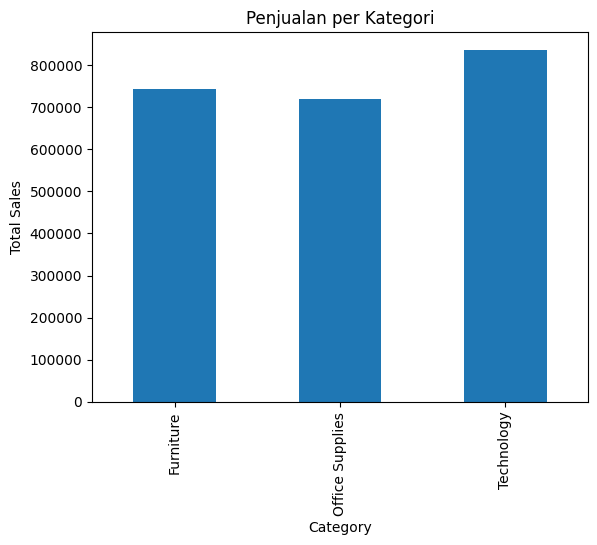

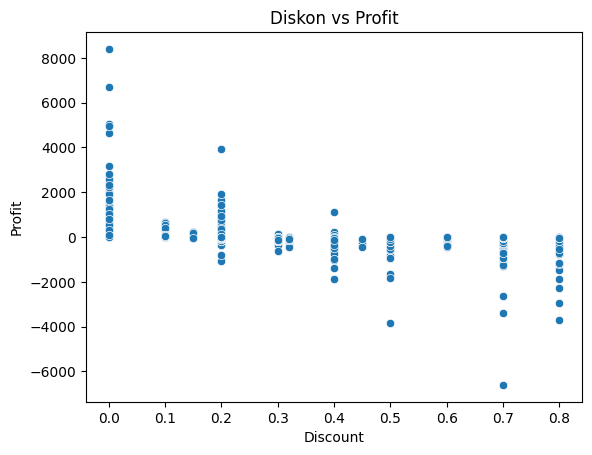

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df ['Profit'].apply(lambda x : 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test, = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree")
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Decision Tree
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix :
 [[ 441  106]
 [  91 2361]]


KNN (K Nearest Neighbour)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

df['Label'] = df ['Profit'].apply(lambda x : 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test, = train_test_split(features, labels, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN (K Nearest Neighbour)")
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

KNN (K Nearest Neighbour)
Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.36      0.46       547
           1       0.87      0.96      0.91      2452

    accuracy                           0.85      2999
   macro avg       0.76      0.66      0.69      2999
weighted avg       0.83      0.85      0.83      2999

Confusion Matrix :
 [[ 197  350]
 [ 109 2343]]


Naive Bayes (GaussianNB)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = pd.read_excel("Datasets Superstore.xlsx")

df["Label"] = df["Profit"].apply(lambda x: 1 if x > 0 else 6)

features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Naive Bayes (GaussianNB)")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Naive Bayes (GaussianNB)
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96      2452
           6       0.98      0.66      0.79       547

    accuracy                           0.93      2999
   macro avg       0.95      0.83      0.87      2999
weighted avg       0.94      0.93      0.93      2999

Confusion Matrix:
 [[2443    9]
 [ 187  360]]


KESIMPULAN DAN PENJELASAN

Perbedaan akurasi yang dihasilkan oleh ketiga metode klasifikasi—Decision Tree, KNN, dan Naive Bayes—disebabkan oleh perbedaan mendasar dalam cara masing-masing algoritma mempelajari dan memprediksi data.

Decision Tree membangun model seperti pohon yang memisahkan data berdasarkan fitur yang paling relevan. Ini membuatnya mampu menangkap hubungan kompleks dalam data, tetapi sangat rentan terhadap overfitting jika pohon terlalu dalam atau tidak dipangkas, terutama jika terdapat noise atau data tidak seimbang.

KNN bekerja berdasarkan kemiripan jarak antar data, sehingga sangat tergantung pada skala data dan pemilihan jumlah tetangga (nilai K). Tanpa normalisasi, fitur seperti "Sales" yang memiliki rentang besar bisa mendominasi perhitungan jarak dan menurunkan akurasi.

Naive Bayes, di sisi lain, menggunakan pendekatan probabilistik dengan asumsi bahwa semua fitur bersifat independen. Dalam praktiknya, asumsi ini jarang terpenuhi karena banyak fitur yang saling berkorelasi (contohnya "Sales" dan "Profit"), sehingga model bisa membuat prediksi yang tidak akurat.
Dengan demikian, akurasi yang berbeda-beda muncul karena ketidaksesuaian algoritma terhadap struktur data dan asumsi dasar masing-masing metode. Untuk mendapatkan performa terbaik, penting melakukan analisis terhadap karakteristik dataset sebelum memilih algoritma yang digunakan.